Found 19250 images belonging to 11 classes.
Found 2750 images belonging to 11 classes.
Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 259s 846ms/step - accuracy: 0.5268 - loss: 2.6016 - val_accuracy: 0.1522 - val_loss: 9.8825 - learning_rate: 5.0000e-04
Epoch 2/50
  1/300 ━━━━━━━━━━━━━━━━━━━━ 1:24 281ms/step - accuracy: 0.7812 - loss: 1.5052

C:\Users\naomi\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7812 - loss: 1.5052 - val_accuracy: 0.0806 - val_loss: 9.7732 - learning_rate: 5.0000e-04
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 202s 674ms/step - accuracy: 0.7628 - loss: 1.4769 - val_accuracy: 0.9208 - val_loss: 1.0327 - learning_rate: 5.0000e-04
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8281 - loss: 1.1770 - val_accuracy: 0.8710 - val_loss: 1.1353 - learning_rate: 5.0000e-04
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 95s 318ms/step - accuracy: 0.8380 - loss: 1.1296 - val_accuracy: 0.9520 - val_loss: 0.8154 - learning_rate: 5.0000e-04
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.8438 - loss: 1.0680 - val_accuracy: 1.0000 - val_loss: 0.7296 - learning_rate: 5.0000e-04
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 142s 475ms/step - accuracy: 0.8762 - loss: 0.9118 - val_accuracy: 0.9639 - val_loss: 0.6380 - learning_rate: 5.0000e-04
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


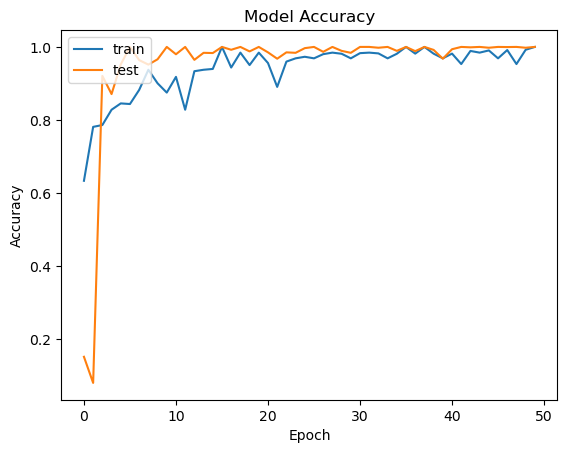

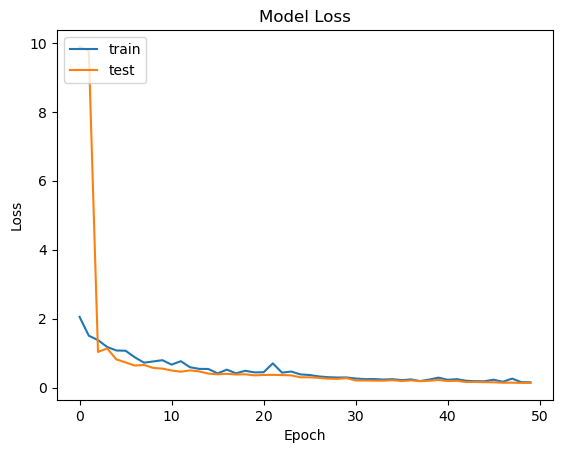

In [2]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Initializing the CNN
classifier = Sequential()

# Step 1 - Convolution Layer with Batch Normalization
classifier.add(Input(shape=(64, 64, 3)))
classifier.add(Convolution2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding second convolution layer with L2 regularization and Batch Normalization
classifier.add(Convolution2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding third convolution layer with L2 regularization and Batch Normalization
classifier.add(Convolution2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Fully Connected Layer with Dropout and L2 Regularization
classifier.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
classifier.add(Dropout(0.5))  # Dropout for regularization

# Output layer
classifier.add(Dense(11, activation='softmax'))

# Compiling the CNN using Adam optimizer with an adjusted learning rate
classifier.compile(
    optimizer=optimizers.Adam(learning_rate=0.0005),  # Slightly increase learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Part 2 - Fitting the CNN to the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Added vertical flip for more augmentation
    rotation_range=30  # Added rotation augmentation
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'mydata/training_set',
    target_size=(64, 64),
    batch_size=64,  # Increased batch size to stabilize training
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    'mydata/test_set',
    target_size=(64, 64),
    batch_size=64,  # Match the batch size of the training set
    class_mode='categorical'
)

# Add callbacks for training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
model = classifier.fit(
    training_set,
    steps_per_epoch=training_set.samples // training_set.batch_size,
    epochs=50,  # Increased epochs to allow more training time
    validation_data=test_set,
    validation_steps=test_set.samples // test_set.batch_size,
    callbacks=[reduce_lr, early_stop]  # Add callbacks for better stability
)

# Save the model
classifier.save('Trained_model.h5')

# Plot training history
print(model.history.keys())

# Summarize history for accuracy
plt.plot(model.history['accuracy'], label='Train Accuracy')
plt.plot(model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(model.history['loss'], label='Train Loss')
plt.plot(model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()